# Pandas - Python Data Analysis

## Upgrade PIP

Windows

    python -m pip install -U pip

Linux
   
    pip install -U pip

### Install Packages if required

In [8]:
!pip install wheel

## Importing required libraries

In [65]:
%matplotlib inline
from pandas import *
from pylab import *
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)
    
def htmldisp(x):
    try:
        return HTML(pd.DataFrame(x).to_html())
    except:
        print ("Alert!! \nInput should be a Pandas obj.")

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

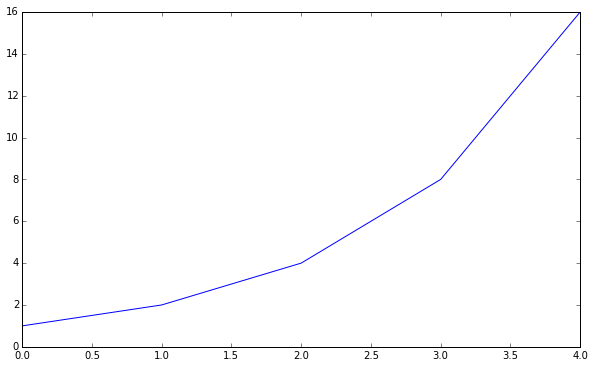

In [10]:
plt.plot([1,2,4,8,16])

Series
======

In [11]:
np.random.randn(5)

array([-0.77666345,  0.21922168, -0.59648485, -1.11053507,  1.64264169])

In [12]:
labels = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(np.random.randn(5), index=labels)

In [13]:
'b' in s

True

In [14]:
s['b']

2.0394559173140667

In [15]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [16]:
s

a   -0.659063
b    2.039456
c    1.373997
d   -0.066320
e    0.652848
dtype: float64

In [17]:
mapping = s.to_dict()
mapping

{'a': -0.65906296688486588,
 'b': 2.0394559173140667,
 'c': 1.373996559303615,
 'd': -0.066320116618075436,
 'e': 0.65284773391411055}

In [18]:
s = pd.Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b    2.039456
e    0.652848
a   -0.659063
d   -0.066320
f         NaN
dtype: float64

In [19]:
notnull(s)

b     True
e     True
a     True
d     True
f    False
dtype: bool

In [20]:
s[notnull(s)]

b    2.039456
e    0.652848
a   -0.659063
d   -0.066320
dtype: float64

In [21]:
s.dropna()

b    2.039456
e    0.652848
a   -0.659063
d   -0.066320
dtype: float64

In [22]:
s * 2

b    4.078912
e    1.305695
a   -1.318126
d   -0.132640
f         NaN
dtype: float64

In [23]:
s[3:]

d   -0.06632
f        NaN
dtype: float64

In [24]:
s[:3]

b    2.039456
e    0.652848
a   -0.659063
dtype: float64

In [25]:
s.index

Index([u'b', u'e', u'a', u'd', u'f'], dtype='object')

DataFrame: 2D collection of Series
==================================

In [26]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df['d'] = range(6)
df

,a,b,c,d
0,0.525474,foo,-0.928701,0
1,1.221418,bar,-0.019107,1
2,0.572582,foo,-0.697442,2
3,-0.019335,bar,-0.981090,3
4,-2.397562,foo,1.461170,4
5,-0.780932,bar,-0.428393,5


In [27]:
df['b']    # by column

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b, dtype: object

In [28]:
df[:3]

,a,b,c,d
0,0.525474,foo,-0.928701,0
1,1.221418,bar,-0.019107,1
2,0.572582,foo,-0.697442,2


In [29]:
df[:-2]

,a,b,c,d
0,0.525474,foo,-0.928701,0
1,1.221418,bar,-0.019107,1
2,0.572582,foo,-0.697442,2
3,-0.019335,bar,-0.981090,3


In [30]:
df[-2:]   # the last 2 rows

,a,b,c,d
4,-2.397562,foo,1.461170,4
5,-0.780932,bar,-0.428393,5


In [31]:
df[['a','b']]

,a,b
0,0.525474,foo
1,1.221418,bar
2,0.572582,foo
3,-0.019335,bar
4,-2.397562,foo
5,-0.780932,bar


In [32]:
np.tile(['foo', 'bar'], 3)   # in numpy

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'], 
      dtype='|S3')

In [33]:
df.xs(0)   # returning the first row

a    0.525474
b         foo
c   -0.928701
d           0
Name: 0, dtype: object

In [34]:
df.ix[2]    # does equal thing as above. In this case, 3rd row. 

a    0.572582
b         foo
c   -0.697442
d           2
Name: 2, dtype: object

In [35]:
df.ix[2, 'b']

'foo'

In [36]:
timeit df.ix[1]

10000 loops, best of 3: 105 µs per loop


In [37]:
df.get_value(2, 'b')

'foo'

In [38]:
timeit df.ix[2, 'b']

The slowest run took 10.31 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.04 µs per loop


In [39]:
timeit df.get_value(2, 'b')

The slowest run took 11.67 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.49 µs per loop


In [40]:
df.ix[2:4, 'b']

2    foo
3    bar
4    foo
Name: b, dtype: object

In [41]:
df.ix[2:4, ['b', 'c']]

,b,c
2,foo,-0.697442
3,bar,-0.981090
4,foo,1.461170


In [42]:
df.ix[2:4, 'b':'c']   # slices by column - essentially the same as above.

,b,c
2,foo,-0.697442
3,bar,-0.981090
4,foo,1.461170


In [43]:
df.ix[2:4, 0:2]

,a,b
2,0.572582,foo
3,-0.019335,bar
4,-2.397562,foo


In [44]:
df.ix[[0, 2, 4], ['b', 'c', 'd']]   # pass a list of rows and columns I want to select out

,b,c,d
0,foo,-0.928701,0
2,foo,-0.697442,2
4,foo,1.461170,4


In [45]:
df['c'] > 0

0    False
1    False
2    False
3    False
4     True
5    False
Name: c, dtype: bool

In [46]:
df.ix[df['c'] > 0]   # boolean arrays

,a,b,c,d
4,-2.397562,foo,1.46117,4


In [47]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [48]:
df.columns

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [49]:
pandas.date_range('1/1/2000',periods=6)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06'],
              dtype='datetime64[ns]', freq='D')

In [50]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=pandas.date_range('1/1/2000', periods=6))
df

,a,b,c
2000-01-01,-0.633389,foo,-0.481991
2000-01-02,-0.356704,bar,-1.827860
2000-01-03,1.840481,foo,-0.538008
2000-01-04,0.227594,bar,1.692797
2000-01-05,1.263390,foo,-1.094993
2000-01-06,-1.054102,bar,0.190967


In [51]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.752489,foo,1.509759,NaN
1,-0.035462,bar,1.259030,NaN
2,1.506903,foo,1.211627,NaN
3,1.302028,bar,-0.779969,NaN
4,-0.437162,foo,-1.220543,NaN
5,-1.015929,bar,-0.031962,NaN


In [52]:
isnull(df)

,a,b,c,d
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True


Creation from nested dicts
--------------------------

These arise naturally in Python code

In [53]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()   # sorted cols: bar, baz, foo
data

{'bar': {'a': -0.2742087421979518,
  'b': -0.5884332166168744,
  'c': 0.8882539467547058,
  'd': -0.3344775301054686},
 'baz': {'a': 0.27960324735042086,
  'b': -1.3124341559736814,
  'c': 0.6067046661901261,
  'd': -0.1594358136656239},
 'foo': {'a': -0.44368931109138227,
  'b': 0.6905747310970697,
  'c': -1.4753429554453497,
  'd': -1.353267752483336}}

In [54]:
del data ['foo']['c']   # delete an entry by index key (col) and row.

In [55]:
DataFrame(data)   # pass a dict 

,bar,baz,foo
a,-0.274209,0.279603,-0.443689
b,-0.588433,-1.312434,0.690575
c,0.888254,0.606705,NaN
d,-0.334478,-0.159436,-1.353268


Data alignment
==============

In [56]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [64]:
!head -n 10 stock_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
!head  stock_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [59]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [60]:
s1 = close_px['AAPL'][-20:]      # the last 20 rows
s2 = close_px['AAPL'][-25:-10]   # the last 25 - last 10 = 15 rows.
side_by_side(s1, s2)

ImportError: cannot import name adjoin

In [ ]:
s1 + s2

In [ ]:
s1.add(s2, fill_value=0)

In [ ]:
(s1 + s2).dropna()

In [ ]:
df = close_px.ix[-10:, :3]
df

In [ ]:
side_by_side(s1.reindex(s2.index), s2)   # align indexes of s1 and s2. Print 2 objects alongside each other.

In [ ]:
side_by_side(s1.ix[s2.index], s2)   # same as above, supported in newer version of 0.12 ipython.

In [ ]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

In [ ]:
b, c  = s1.align(s2, join='outer')
side_by_side(b, c)

b, c  = s1.align(s2, join='right')
side_by_side(b, c)

In [ ]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

In [ ]:
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

In [ ]:
df + df2

In [ ]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

Transposing: no copy if all columns are same type
-------------------------------------------------

In [ ]:
df[:5].T

Columns can be any type
-----------------------

In [ ]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = pandas.date_range('1/1/2000', periods=n)
foo

In [ ]:
foo.dtypes

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [ ]:
foo.T.T

In [ ]:
foo.T.T.dtypes

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [ ]:
df

In [ ]:
df.apply(np.mean)

In [ ]:
df.mean()   # same as above.   df.mean? to look up the function usage.

In [ ]:
df.mean(1)   # get the mean of the rows based on a column. Also excludes missing data (NaN: not a number).

In [ ]:
df.mean(1, skipna=False)   # flag skipna: to include NaN. In this data, no NaN.

In [ ]:
df.apply(np.mean, axis=1)   # same as above.

You can get as fancy as you want

In [ ]:
close_px    # Output: 1000 rows.

In [ ]:
close_px.AAPL   # For easier typing, after dot ., use tab to select the name of the stock.

In [ ]:
close_px.AAPL.idxmax() # gives index of its maximum value.

In [ ]:
close_px.AAPL.index[1]

In [ ]:
#close_px.AAPL.index[close_px.AAPL.argmax()]    # If you are numpy aficionado, does the same thing.

In [ ]:
close_px.AA.idxmax()

def peak_date(series):
    return series.idxmax()

In [ ]:
close_px.apply(peak_date)

In [ ]:
for column in close_px:
    print close_px[column].max()

In [ ]:
def peak_date(series):
    return series.idxmax()    # new method: series.idxmax()
close_px.apply(peak_date, axis=0)

In [ ]:
df.apply(lambda x: x.max())

In [ ]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

In [ ]:
np.log(close_px)

Hierarchical indexing
------------------------

In [ ]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

In [ ]:
hdf.ix['foo']

In [ ]:
hdf.ix['foo'] = 0
hdf

In [ ]:
hdf.ix['bar','one']['A']

Stacking and unstacking
-----------------------

In [ ]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

In [ ]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

In [ ]:
df.unstack()['B']

GroupBy
=======

In [ ]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [ ]:
for key, group in df.groupby('A'):
    print key
    print group

In [ ]:
df.groupby('A')['C'].describe().T

In [ ]:
df.groupby('A').mean()

In [ ]:
for key, group in df.groupby('A'):
    print key
    print group

In [ ]:
df.groupby(['A', 'B']).mean()

In [ ]:
#df.groupby(['A', 'B'], as_index=False).mean()

In [ ]:
df.stack()

In [ ]:
#df.stack().mean(1).unstack()

In [ ]:
#df.groupby(level=1, axis=1).mean()

## Crosstabs

In [ ]:
pd.crosstab([df.,sal.Status], sal.EmployeeNameStarts, values=sal.TotalPay, aggfunc= [np.min,np.max])